# 데이터셋 불러오기

In [1]:
# 라이브러리 환경
import polars as pl
import pandas as pd
import numpy as np

In [2]:
# skleran 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값을 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
# target 속성의 데이터셋 크기
print("데이터셋 크기:", iris['target'].shape)

# target 속성의 데이터셋 내용
print("데이터셋 내용: \n", iris['target'])

데이터셋 크기: (150,)
데이터셋 내용: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)
# data 속성의 데이터셋 내용 (첫 7개 행을 추출)
print("데이터셋 내용: \n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [6]:
# data 속성을 폴라스 데이터프레임으로 변환
df = pl.DataFrame(iris['data'], schema=iris['feature_names'])
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
f64,f64,f64,f64
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2


In [7]:
# 열(column) 이름을 간결하게 변경
new_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.columns = new_columns
df.head(2)

sepal_length,sepal_width,petal_length,petal_width
f64,f64,f64,f64
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2


In [8]:
# Target 열 추가
df = df.with_columns(pl.Series(name="Target", values=iris['target']))
print('데이터셋의 크기: ', df.shape)
df.head()

데이터셋의 크기:  (150, 5)


sepal_length,sepal_width,petal_length,petal_width,Target
f64,f64,f64,f64,i64
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


# 데이터 탐색(EDA)

In [9]:
# 데이터프레임의 기본정보
print(df.schema)
print(df.glimpse())

Schema({'sepal_length': Float64, 'sepal_width': Float64, 'petal_length': Float64, 'petal_width': Float64, 'Target': Int64})
Rows: 150
Columns: 5
$ sepal_length <f64> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9
$ sepal_width  <f64> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1
$ petal_length <f64> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5
$ petal_width  <f64> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1
$ Target       <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

None


In [10]:
# 통계정보 요약
df.describe()

statistic,sepal_length,sepal_width,petal_length,petal_width,Target
str,f64,f64,f64,f64,f64
"""count""",150.0,150.0,150.0,150.0,150.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",5.843333,3.057333,3.758,1.199333,1.0
"""std""",0.828066,0.435866,1.765298,0.762238,0.819232
"""min""",4.3,2.0,1.0,0.1,0.0
"""25%""",5.1,2.8,1.6,0.3,0.0
"""50%""",5.8,3.0,4.4,1.3,1.0
"""75%""",6.4,3.3,5.1,1.8,2.0
"""max""",7.9,4.4,6.9,2.5,2.0


In [11]:
# 결측값 확인
df.null_count()

sepal_length,sepal_width,petal_length,petal_width,Target
u32,u32,u32,u32,u32
0,0,0,0,0


In [12]:
# 중복 데이터 확인
df.is_duplicated().sum()

2

In [13]:
# 중복 데이터 출력
df.filter(df.is_duplicated())

sepal_length,sepal_width,petal_length,petal_width,Target
f64,f64,f64,f64,i64
5.8,2.7,5.1,1.9,2
5.8,2.7,5.1,1.9,2


In [14]:
# 중복 데이터 모두 출력
df.filter((pl.col("sepal_length") == 5.8) & (pl.col("petal_width") == 1.9))

sepal_length,sepal_width,petal_length,petal_width,Target
f64,f64,f64,f64,i64
5.8,2.7,5.1,1.9,2
5.8,2.7,5.1,1.9,2


In [15]:
# 중복 데이터 제거
df = df.unique()
df.filter((pl.col("sepal_length") == 5.8) & (pl.col("petal_width") == 1.9))

sepal_length,sepal_width,petal_length,petal_width,Target
f64,f64,f64,f64,i64
5.8,2.7,5.1,1.9,2


In [16]:
# 변수 간의 상관관계 분석
df.corr()

sepal_length,sepal_width,petal_length,petal_width,Target
f64,f64,f64,f64,f64
1.0,-0.118129,0.873738,0.82062,0.786971
-0.118129,1.0,-0.426028,-0.362894,-0.422987
0.873738,-0.426028,1.0,0.962772,0.949402
0.82062,-0.362894,0.962772,1.0,0.956514
0.786971,-0.422987,0.949402,0.956514,1.0


In [17]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

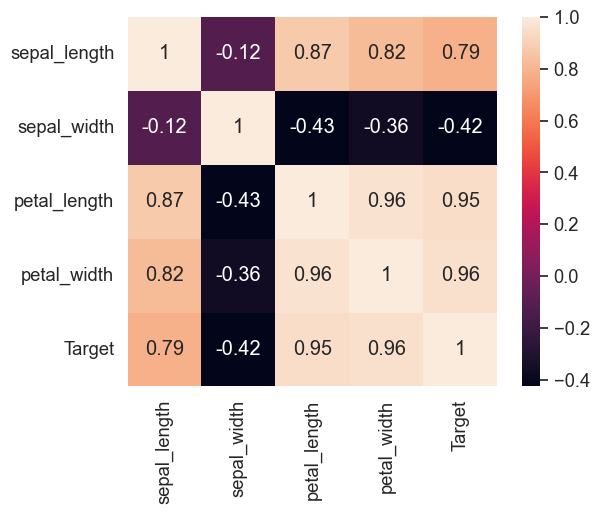

In [18]:
# 상관계수 히트맵
# pandas로 변환하여 시각화
sns.heatmap(data=df.to_pandas().corr(), square=True, annot=True, cbar=True)
plt.show()

In [19]:
# Target 값의 분포 - value_counts 함수
# polars에서는 value_counts()
df['Target'].value_counts()

Target,count
i64,u32
1,50
0,50
2,49


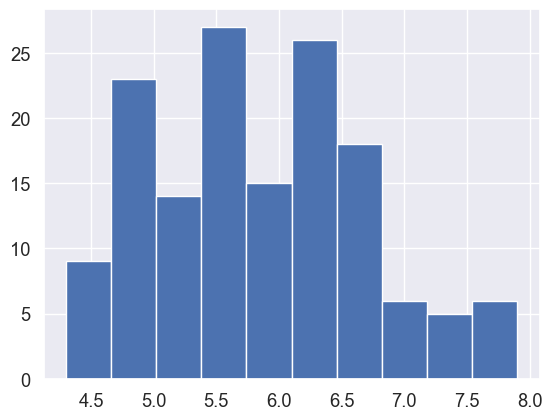

In [20]:
# sepal_length 값의 분포 - hist 함수
# pandas로 변환하여 시각화
plt.hist(x='sepal_length', data=df.to_pandas())
plt.show()

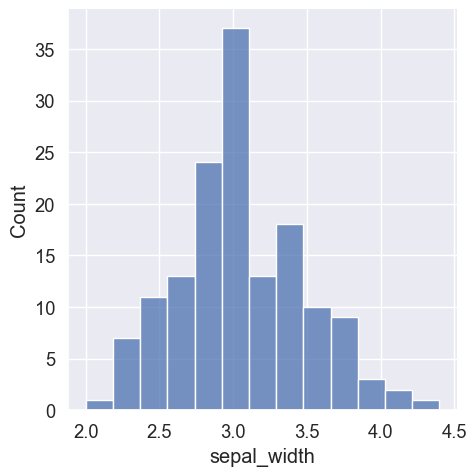

In [21]:
# sepal_widgth 값의 분포 - displot 함수 (histogram)
# pandas로 변환하여 시각화
sns.displot(x='sepal_width', kind='hist', data=df.to_pandas())
plt.show()

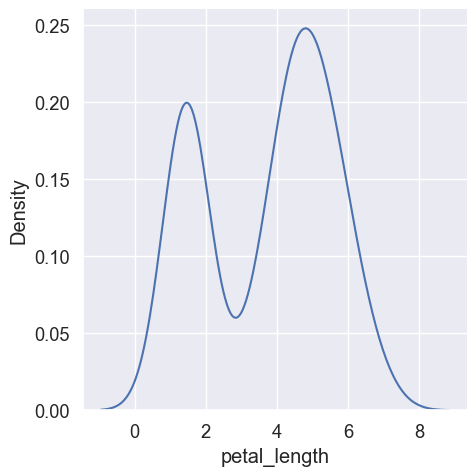

In [22]:
# petal_length 값의 분포 - displot 함수 (kde density)
# pandas로 변환하여 시각화
sns.displot(x='petal_length', kind='kde', data=df.to_pandas())
plt.show()

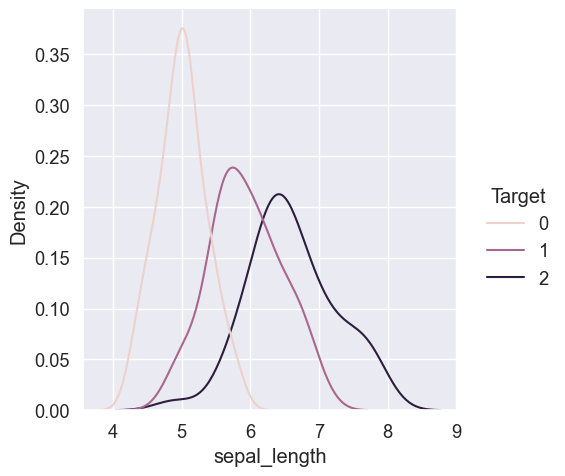

In [23]:
# 품종별 sepal_length 값의 분포 - displot 함수 (kind='kde')
# pandas로 변환하여 시각화
sns.displot(x='sepal_length', hue='Target', kind='kde', data=df.to_pandas())
plt.show()

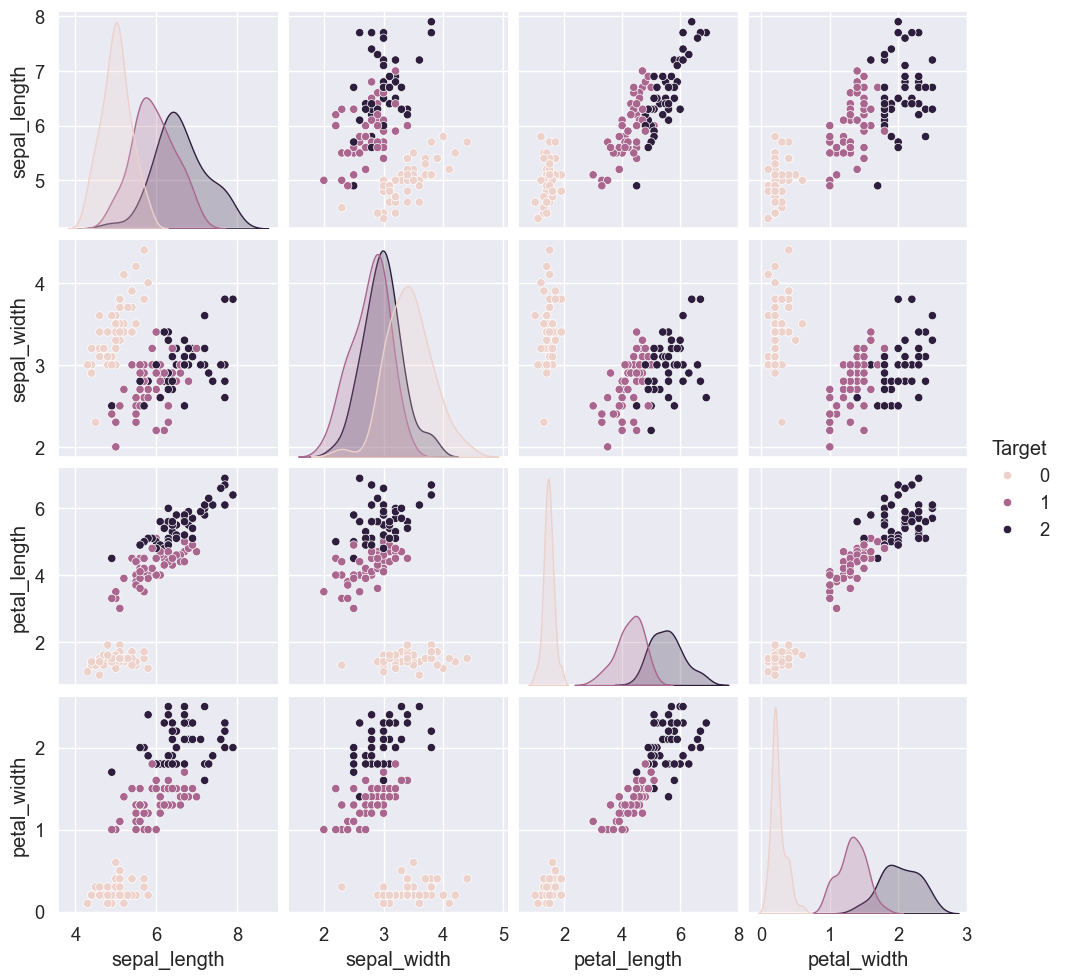

In [24]:
# 4개 변수 간의 관계 - pairplot 함수
# pandas로 변환하여 시각화
sns.pairplot(df.to_pandas(), hue='Target', height=2.5, diag_kind='kde')
plt.show()

# 데이터 전처리

In [25]:
from sklearn.model_selection import train_test_split
# polars DF에서 X, y 추출
X_data = df.drop('Target')
y_data = df.select('Target')

# numpy나 pandas로 변환하는 것이 sklearn 호환성에 더 안전함
X_train, X_test, y_train, y_test = train_test_split(X_data.to_pandas(), y_data.to_pandas(), test_size=0.2, shuffle=True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(119, 4) (119, 1)
(30, 4) (30, 1)


### KNN

In [26]:
# 모델 학습
from sklearn.neighbors import KNeighborsClassifier
# y_train은 1차원 배열이어야 하므로 values.ravel() 또는 similar 사용
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train.values.ravel())

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",7
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [27]:
# 예측
y_knn_pred = knn.predict(X_test)
print("예측값: ", y_knn_pred[:5])

예측값:  [2 0 2 1 1]


In [28]:
# 성능 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy: %.4f" % knn_acc)

Accuracy: 0.9667


### SVM

In [29]:
# 모델 학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train.values.ravel())

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [30]:
# 예측
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred[:5])

예측값:  [2 0 2 1 1]


In [31]:
# 성능 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy: %.4f" % svc_acc)

Accuracy: 0.9667


### Logistic Regression

In [32]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train, y_train.values.ravel())

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [33]:
# 예측
y_lrc_pred = lrc.predict(X_test)
print("예측값: ", y_lrc_pred[:5])

예측값:  [2 0 2 1 1]


In [34]:
# 성능 평가
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("Accuracy: %.4f" % lrc_acc)

# 확률 예측
y_lrc_prob = lrc.predict_proba(X_test)
y_lrc_prob

Accuracy: 0.9667


array([[3.58867931e-05, 1.48900237e-01, 8.51063876e-01],
       [9.73451321e-01, 2.65485733e-02, 1.05724520e-07],
       [1.02304971e-03, 4.76682337e-01, 5.22294613e-01],
       [8.98046391e-03, 8.38459958e-01, 1.52559578e-01],
       [8.15971330e-03, 9.00240311e-01, 9.15999755e-02],
       [9.79643368e-01, 2.03565733e-02, 5.87946139e-08],
       [9.76167915e-02, 8.89398721e-01, 1.29844874e-02],
       [9.83360064e-01, 1.66398987e-02, 3.74691775e-08],
       [9.77154304e-01, 2.28456165e-02, 7.99024608e-08],
       [2.56005917e-02, 9.44158578e-01, 3.02408307e-02],
       [2.08155070e-05, 3.77703271e-02, 9.62208857e-01],
       [4.65186474e-03, 9.00527675e-01, 9.48204603e-02],
       [5.10853114e-02, 9.39500068e-01, 9.41462105e-03],
       [1.78186834e-03, 4.09059094e-01, 5.89159038e-01],
       [2.83814632e-02, 9.26016318e-01, 4.56022187e-02],
       [9.86739946e-01, 1.32600232e-02, 3.04109560e-08],
       [1.69497690e-04, 6.25473164e-02, 9.37283186e-01],
       [9.72769376e-01, 2.72305

### Decision Tree

In [35]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(X_train, y_train.values.ravel())

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",20
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [36]:
# 예측
y_dtc_pred = dtc.predict(X_test)
print("예측값: ", y_dtc_pred[:5])

예측값:  [2 0 2 1 1]


In [37]:
# 성능 평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy: %.4f" % dtc_acc)

Accuracy: 0.9667


### 앙상블 모델 - Voting

In [38]:
# 모델 학습
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT', dtc)], voting='hard')
hvc.fit(X_train, y_train.values.ravel())

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('KNN', ...), ('SVM', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'hard'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",7
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2


In [39]:
# 예측
y_hvc_pred = hvc.predict(X_test)
print("예측값: ", y_hvc_pred[:5])

예측값:  [2 0 2 1 1]


In [40]:
# 성능 평가
hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("Accuracy: %.4f" % hvc_acc)

Accuracy: 0.9667


### 앙상블 모델 - RandomForest

In [41]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(X_train, y_train.values.ravel())

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_t

In [42]:
# 예측
y_rfc_pred = rfc.predict(X_test)
print("예측값: ", y_rfc_pred[:5])

예측값:  [2 0 2 1 1]


In [43]:
# 성능 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("Accuracy: %.4f" % rfc_acc)

Accuracy: 0.9667


### XGBoost

In [44]:
# 모델 학습
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=20)
xgbc.fit(X_train, y_train.values.ravel())

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [45]:
# 예측
y_xgbc_pred = xgbc.predict(X_test)
print("예측값: ", y_xgbc_pred[:5])

예측값:  [2 0 2 1 1]


In [46]:
# 성능 평가
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print("Accuracy: %.4f" % xgbc_acc)

Accuracy: 0.9333


### 교차 검증 (Cross-Validation)

In [47]:
# K-Fold Cross Validation
# K-fold GridSearch와 같이 사용할때가 많다
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=20)

from sklearn.model_selection import cross_val_score
# X_data, y_data는 polars DataFrame이므로 to_pandas() 또는 to_numpy() 필요
# 위에서 X_train 등의 split은 이미 했지만, cross_val_score는 전체 데이터를 사용
score = cross_val_score(knn, X_data.to_pandas(), y_data.to_pandas().values.ravel(), cv=kfold, scoring='accuracy')
print("5-fold Cross Validation Accuracy:", score)
print("Mean Accuracy: %.4f" % score.mean())

5-fold Cross Validation Accuracy: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9667


---